## Z score method is only used for  the "Normal" distribuation 

df['input']= (xi - xi.mean())xi.sd   ----> if the val is in the range of -3 or +3 than it is considered else trimmed or clipped 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r'c:\Users\Admin\Documents\DataSets\placement.csv',encoding='Latin')


In [3]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


#### First find the distributation of cgpa and placement exam marks 

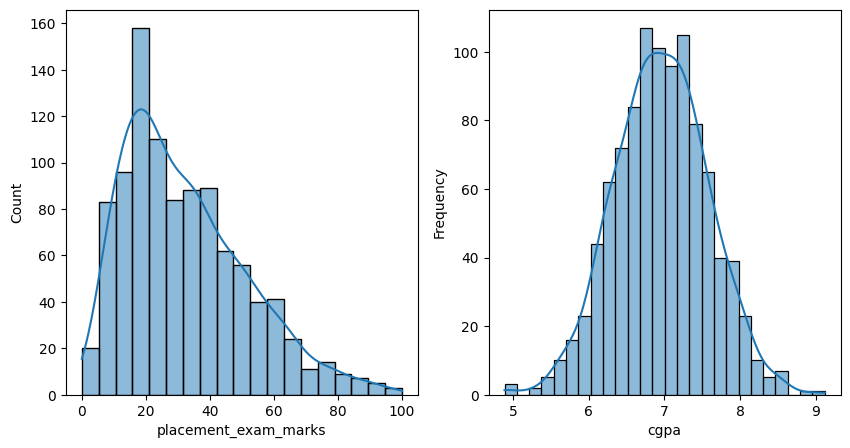

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(122)
sns.histplot(df['cgpa'],kde=True,alpha=0.5)
plt.xlabel('cgpa')
plt.ylabel('Frequency')
plt.subplot(121)
sns.histplot(df['placement_exam_marks'],kde='True')
plt.show()

### As cgpa is normally distribuated so we apply Z-score algo on it , to detect and handle outliers using methods trimming or capping 

In [5]:
print('Mean value of cgpa :',df['cgpa'].mean())
print('std value of cgpa :',df['cgpa'].std())
print('Min value of cgpa :',df['cgpa'].min())
print('Max value of cgpa :',df['cgpa'].max())

Mean value of cgpa : 6.96124
std value of cgpa : 0.6158978751323896
Min value of cgpa : 4.89
Max value of cgpa : 9.12


In [6]:
#Finding the boundary values 
print('highest cgpa allowed:',df['cgpa'].mean()+ 3*df['cgpa'].std())
print('lowest cgpa allowed:',df['cgpa'].mean()- 3*df['cgpa'].std())

highest cgpa allowed: 8.808933625397168
lowest cgpa allowed: 5.113546374602832


In [7]:
#Finding outliers
df[(df['cgpa']>8.80)|(df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming
removing of outliers

In [8]:
new_df = df[(df['cgpa']<8.80)&(df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


## Trimming using Z score 

In [9]:
df['cgpa_Zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [10]:
df

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [11]:
df[df['cgpa_Zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [12]:
df[df['cgpa_Zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [13]:
#Finding end values 
df[(df['cgpa_Zscore']>3)| (df['cgpa_Zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [14]:
trimmed_df = df[(df['cgpa_Zscore']<3)&(df['cgpa_Zscore']>-3)]
trimmed_df

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


<Axes: xlabel='cgpa', ylabel='Density'>

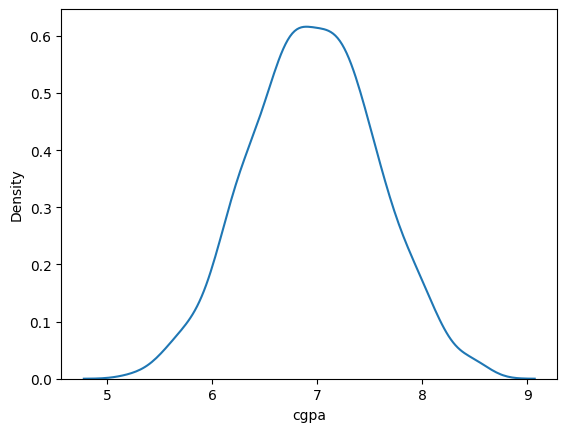

In [15]:
sns.kdeplot(trimmed_df['cgpa']) #distributation after removing outliers

## Capping

In [16]:
upper_limit = df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit = df['cgpa'].mean()-3*df['cgpa'].std()

In [17]:
upper_limit.item()

8.808933625397168

In [18]:
lower_limit.item()

5.113546374602832

np.where(
    pehele condition,
    if condition is True,
    if condn is False,

)

In [19]:
df['cgpa']=np.where(             
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [20]:
df

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [21]:
df.describe() # now my min and max cgpa comes under the range ,hence we capped outliers

,cgpa,placement_exam_marks,placed,cgpa_Zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.465494e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00
